In [33]:
import math
import random

import numpy as np

with open('P2grupo_6.csv', 'r') as f:
    data = list(map(lambda x: (float(x[0]), float(x[1]), float(x[2])), [x.split(',') for x in f.read().split('\n')][:-1]))

$\sigma '(t) = \frac{1}{\cosh^2(t)^2} = 1 - \tanh^2(t) = 1 - \sigma '(t)$

In [19]:
data[:10]

[(1.504848610341167, 0.45259063530561505, 1.0),
 (2.522627979495235, 4.085631359271286, 1.0),
 (2.6097851174627076, 4.750056015296462, 1.0),
 (3.4132704556482043, -4.454156482512969, -1.0),
 (4.738325459162878, -4.440358048900471, -1.0),
 (2.6246260465369, 0.20814943131320707, 1.0),
 (2.856126132290047, 3.395508069323247, 1.0),
 (-2.9130204806013325, 1.4223106980762044, -1.0),
 (-4.058307920878561, -2.528859306343766, 1.0),
 (1.5567098865363826, -3.256366226134303, -1.0)]

In [8]:
def J(a, b, c, d, e):
    retVal = 0

    for element in data:
        retVal += (element[2]-math.tanh(c * math.tanh(a*element[0] + b*element[1] + d) + e))**2

    return retVal/len(data)


In [11]:
J(1,2,3,4,5)

2.017574857147557

In [22]:
def sech2(x):
    return (1/np.cosh(x))**2

def ddxJ(a, b, c, d, e):

    ga = 0
    gb = 0
    gc = 0
    gd = 0
    ge = 0
    for element in data:
        u = element[0]
        v = element[1]
        w = element[2]

        ga += -2*c*u*sech2(d+a*u+b*v) * sech2(e+c*math.tanh(d + a*u +b*v)) * (w-math.tanh(e+c*math.tanh(d+a*u+b*v)))

        gb += -2*c*v*sech2(d+a*u+b*v)*sech2(e+c*math.tanh(d+a*u+b*v)) * (w-math.tanh(e+c*math.tanh(d+a*u+b*v)))

        gc += -2*sech2(e+c*math.tanh(d+a*u+b*v))*math.tanh(d+a*u+b*v)*(w-math.tanh(e+c*math.tanh(d+a*u+b*v)))

        gd += -2*c*sech2(d+a*u+b*v)*sech2(e+c*math.tanh(d+a*u+b*v))*(w-math.tanh(e+c*math.tanh(d+a*u+b*v)))

        ge += -2*sech2(e+c*math.tanh(d+a*u+b*v))*(w-math.tanh(e+c*math.tanh(d+a*u+b*v)))



    ga /= len(data)
    gb /= len(data)
    gc /= len(data)
    gd /= len(data)
    ge /= len(data)
    return ga, gb, gc, gd, ge


ddxJ(1,2,3,4,5)

(0.008455998406167581,
 -0.014170178055707347,
 -0.014585205554887149,
 0.003685798009212804,
 0.015271238918586283)

In [35]:
a,b,c,d,e = random.random()*10-5, random.random()*10-5, random.random()*10-5, random.random()*10-5, random.random()*10-5

print(f"Starting error**2: {J(a,b,c,d,e)}")


errors = []
step_size = 0.2

for idx in range(1000):
    print(f"\rIteration: {idx}", end="")
    da,db,dc,dd,de = ddxJ(a,b,c,d,e)
    a -= da*step_size
    b -= db*step_size
    c -= dc*step_size
    d -= dd*step_size
    e -= de*step_size
    errors.append(J(a,b,c,d,e))

print(f"\rEnd error**2: {J(a,b,c,d,e)}")


Starting error**2: 1.9297478085656685
End error**2: 0.8924501425716356


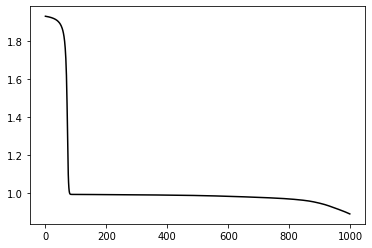

In [36]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots()

plt.plot(errors, color='black')